# Exploratory Data Analysis

<hr>

## Imports

`pandas` for Data Manipulation <br>
`os` for System Interaction <br>
`matplotlib` for Data Visualization <br>

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

## Creating a DataFrame from CSV file

In [2]:
cwd = os.getcwd()

df = pd.read_csv(cwd + "/Cleaned-BA-Reviews.csv", index_col = 0)

In [3]:
df

,Review,Rating,Date,Country,Verified,Corpus,Formatted Date
0,Not Verified | Flew back from Malta after sc...,5.0,22nd October 2023,United Kingdom,False,flew back malta scattering son ash favourite s...,22-10-2023
1,Not Verified | Cabin luggage had to go to carg...,8.0,21st October 2023,Netherlands,False,cabin luggage go cargo even said carried medic...,21-10-2023
2,✅ Trip Verified | I have been using BA for a ...,3.0,21st October 2023,United Kingdom,True,using ba average cannot say pretty satisfied b...,21-10-2023
3,✅ Trip Verified | I flew from Istanbul to Lo...,4.0,19th October 2023,United Kingdom,True,flew istanbul london business class half fligh...,19-10-2023
4,Not Verified | I have flow on BA several time...,1.0,19th October 2023,United States,False,flow ba several time since airline started non...,19-10-2023
...,...,...,...,...,...,...,...
3680,This was a bmi Regional operated flight on a R...,8.0,29th August 2012,United Kingdom,False,bmi regional operated flight rj manchester hea...,29-08-2012
3681,LHR to HAM. Purser addresses all club passenge...,2.0,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...,28-08-2012
3682,My son who had worked for British Airways urge...,7.0,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...,12-10-2011
3683,London City-New York JFK via Shannon on A318 b...,1.0,11th October 2011,United States,False,london city new york jfk via shannon really ni...,11-10-2011


<hr>

**Overall Rating of British Airways**

In [4]:
df.Rating.mean()

4.719140837411636

**Individual Count of Each Rating**

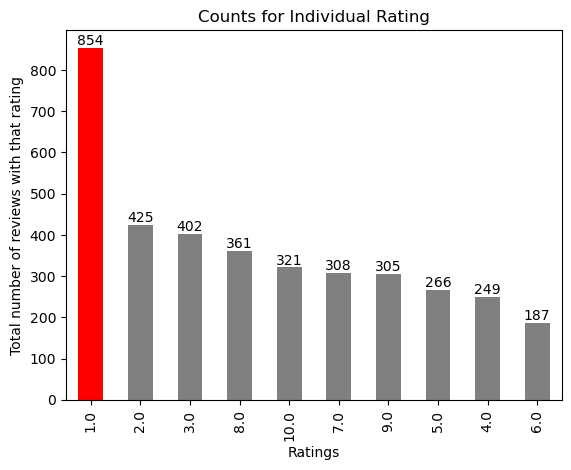

In [5]:
# Get the value counts for each rating and find the maximum among them
value_counts = df['Rating'].value_counts()
max_count_rating = value_counts.idxmax()

# Create a bar chart with annotations and color highlighting
ax = value_counts.plot(kind="bar", color=['red' if rating == max_count_rating else 'grey' for rating in value_counts.index])

# Customize the plot
ax.set(xlabel="Ratings", ylabel="Total number of reviews with that rating", title="Counts for Individual Rating")

# Annotate each bar with its count
for bar in ax.patches:
    ax.annotate(str(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='bottom')

**User Origin Country Count**

In [6]:
df['Country'].nunique()

71

**Country with the highest number of Ratings**

In [7]:
country_wise = df.groupby('Country')['Rating'].count()
top_countries = country_wise[country_wise > 100].index

**Top Countries**

In [8]:
top_countries

Index(['Australia', 'Canada', 'United Kingdom', 'United States'], dtype='object', name='Country')

**Broader Perspective Study**

In [9]:
top_countries_df = df[df['Country'].isin(top_countries)]

In [10]:
top_countries_df.groupby('Country').agg({'Rating' : ['count', 'mean', 'min', 'max']})

Rating                     
                count      mean  min   max
Country                                   
Australia         158  5.151899  1.0  10.0
Canada            116  5.017241  1.0  10.0
United Kingdom   2316  4.679620  1.0  10.0
United States     407  4.675676  1.0  10.0

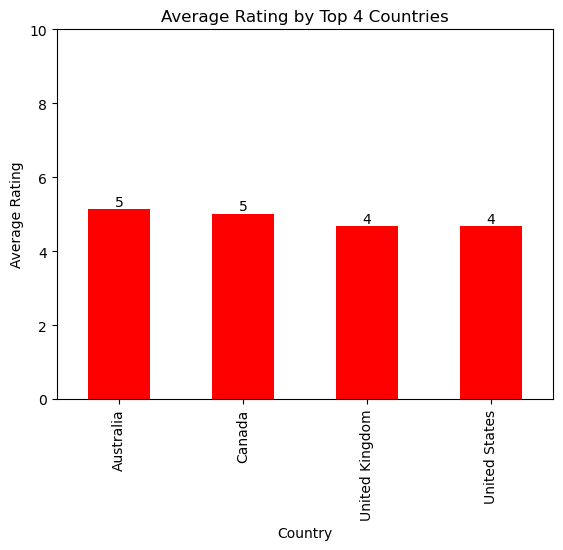

In [11]:
mean_plot = top_countries_df.groupby('Country')['Rating'].mean().plot(kind='bar', color = 'red')

plt.title('Average Rating by Top 4 Countries')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.ylim(0, 10)

# Annotate each bar with its count
for bar in mean_plot.patches:
    mean_plot.annotate(str(int(bar.get_height())), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='bottom')

<Axes: title={'center': 'Australia Rating Chart'}, xlabel='Rating'>

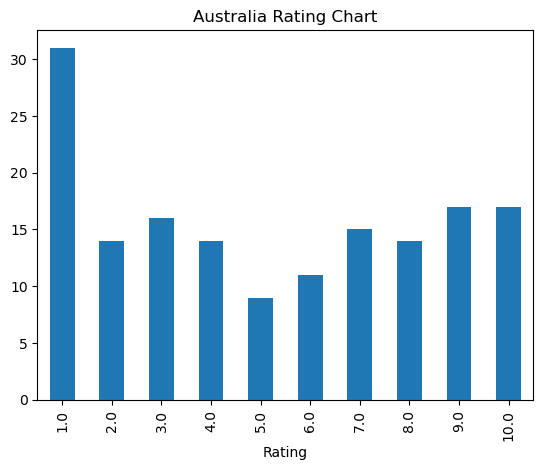

In [12]:
top_countries_df[top_countries_df['Country'] == 'Australia']['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Australia Rating Chart')

<Axes: title={'center': 'Canada Rating Chart'}, xlabel='Rating'>

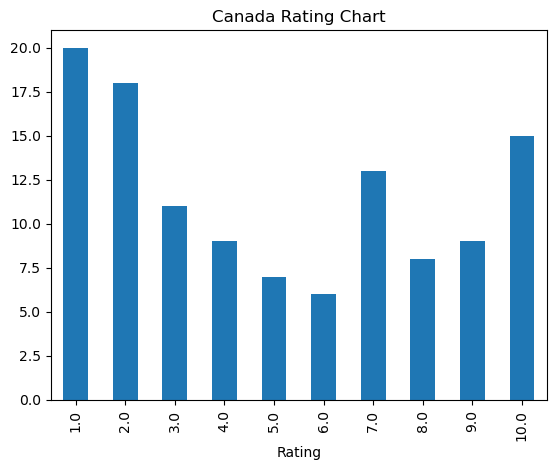

In [13]:
top_countries_df[top_countries_df['Country'] == 'Canada']['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Canada Rating Chart')

<Axes: title={'center': 'United Kingdom Rating Chart'}, xlabel='Rating'>

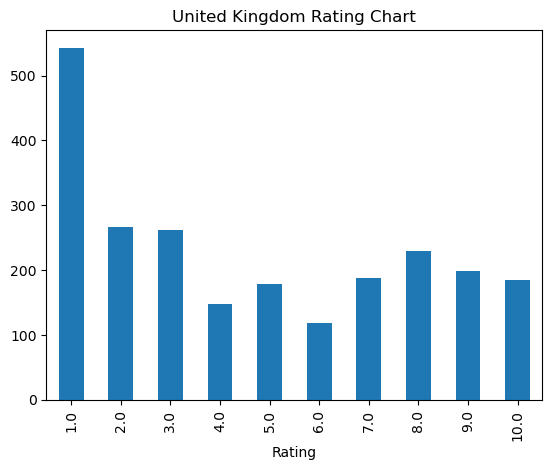

In [14]:
top_countries_df[top_countries_df['Country'] == 'United Kingdom']['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'United Kingdom Rating Chart')

<Axes: title={'center': 'United States Rating Chart'}, xlabel='Rating'>

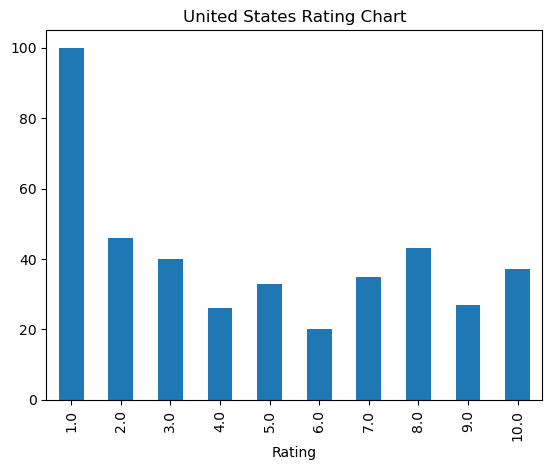

In [15]:
top_countries_df[top_countries_df['Country'] == 'United States']['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'United States Rating Chart')

**Countries that provided Highest Rating**

<Axes: title={'center': 'Top Countries with Average High Ratings'}, xlabel='Country'>

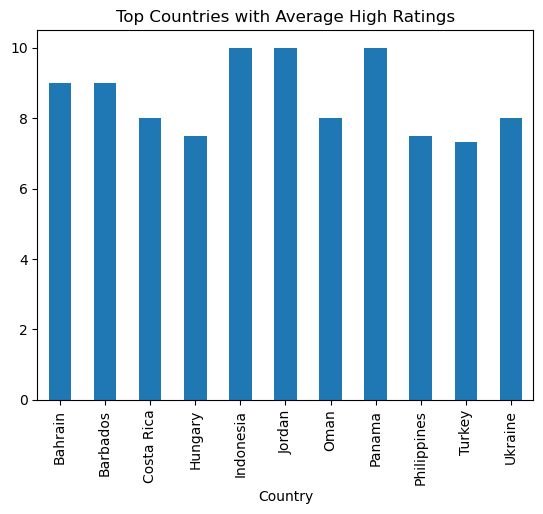

In [16]:
country_ratings = df.groupby('Country')['Rating'].mean()

highest_rated_countries = country_ratings[country_ratings > 7]

highest_rated_countries.plot(kind = 'bar', title = 'Top Countries with Average High Ratings')

<hr>

## Time Series Analysis

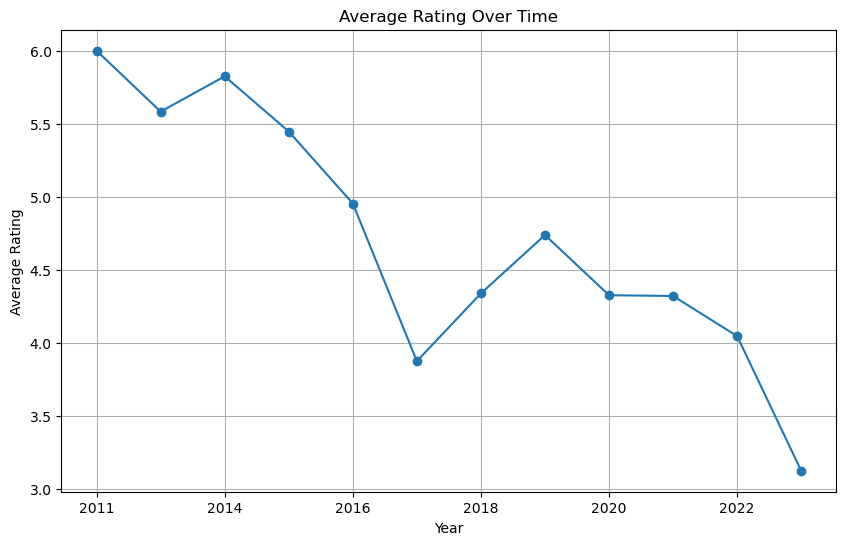

In [17]:
df['Year'] = df['Formatted Date'].str.split('-').str[2]

yearly_ratings = df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 6))
yearly_ratings.plot(marker='o', linestyle='-')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)

<hr>

## Word Cloud

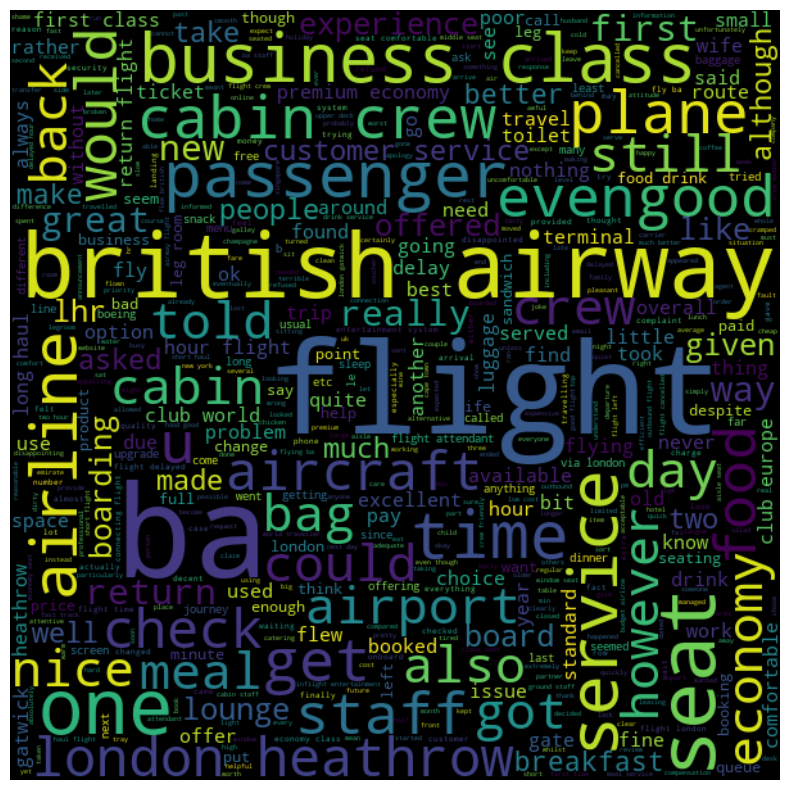

In [18]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Concatenate all text reviews into one long text
reviews = " ".join(df.Corpus)

# Create a figure for the word cloud with specified dimensions
plt.figure(figsize=(10, 10))

# Define a set of stopwords
stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image
wordcloud = WordCloud(
    height=600,
    width=600,
    max_font_size=100,
    max_words=600,
    stopwords=stopwords
).generate(reviews)

# Display the generated word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are numerous words that don't provide clear indications of whether a review is positive or negative. Words like "passenger" and "flight," for instance, don't contribute decisively to sentiment analysis. Therefore, we can incorporate them into our list of stopwords to exclude them from consideration.

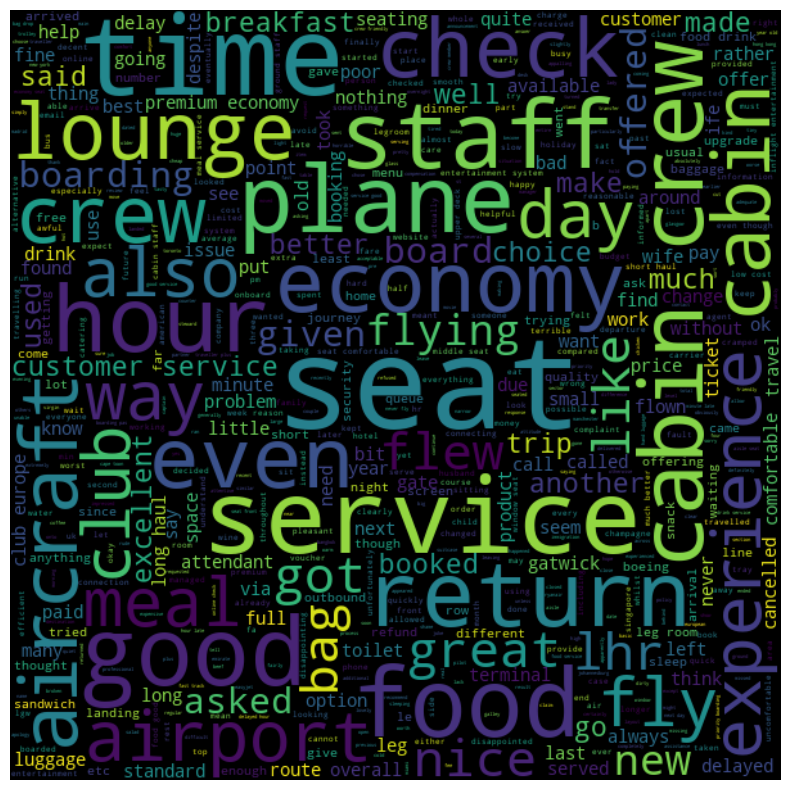

In [19]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.Corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(['british', 'airway', 'flight', 'ba', 'would', 'one', 'get', 'passenger', 'london', 'heathrow', \
                  'however', 'first', 'two', 'back', 'still', 'really', 'airline', 'could', 'told', 'u', 'although', \
                  'seemed', 'world', 'take', 'people', 'business class', 'business', 'class'])

wordcloud = WordCloud(
    height=600,
    width=600,
    max_font_size=100,
    max_words=600,
    stopwords=stopwords
).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<hr>

## Word Frequency

In [20]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['british', 'airway', 'flight', 'ba', 'would', 'one', 'get', 'people', \
                                           'london', 'heathrow', 'however', 'first', 'two', 'back', 'still', 'take', \
                                           'really', 'airline', 'could', 'told', 'u', 'although', 'seemed', 'world'])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

# Create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'passenger'),
  Text(14, 0, 'drink'),
  Text(15, 0, 'plane'),
  Text(16, 0, 'meal'),
  Text(17, 0, 'return'),
  Text(18, 0, 'club'),
  Text(19, 0, 'lounge')])

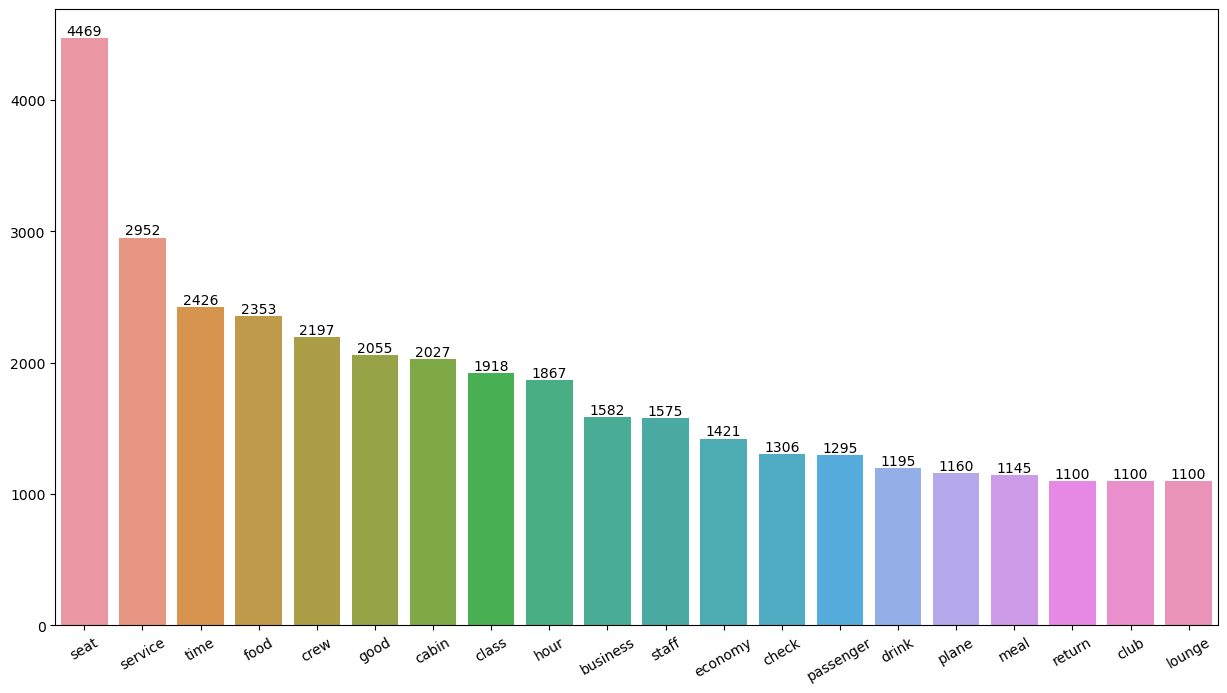

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This provides us with an insight into the topics that customers are discussing in their feedback. We observe that the most frequently mentioned aspects of the airline are "Seat," followed by "Service," "time," "food," and the crew – all of which are crucial to customers in terms of service quality. However, what remains unclear is how customers are expressing their opinions about each of these aspects. To gain a better understanding, we will employ n-gram plots to determine whether these aspects are generally associated with positive or negative experiences.

<hr>

## Word Frequency with N-gram

<Axes: xlabel='Number of Occurrence'>

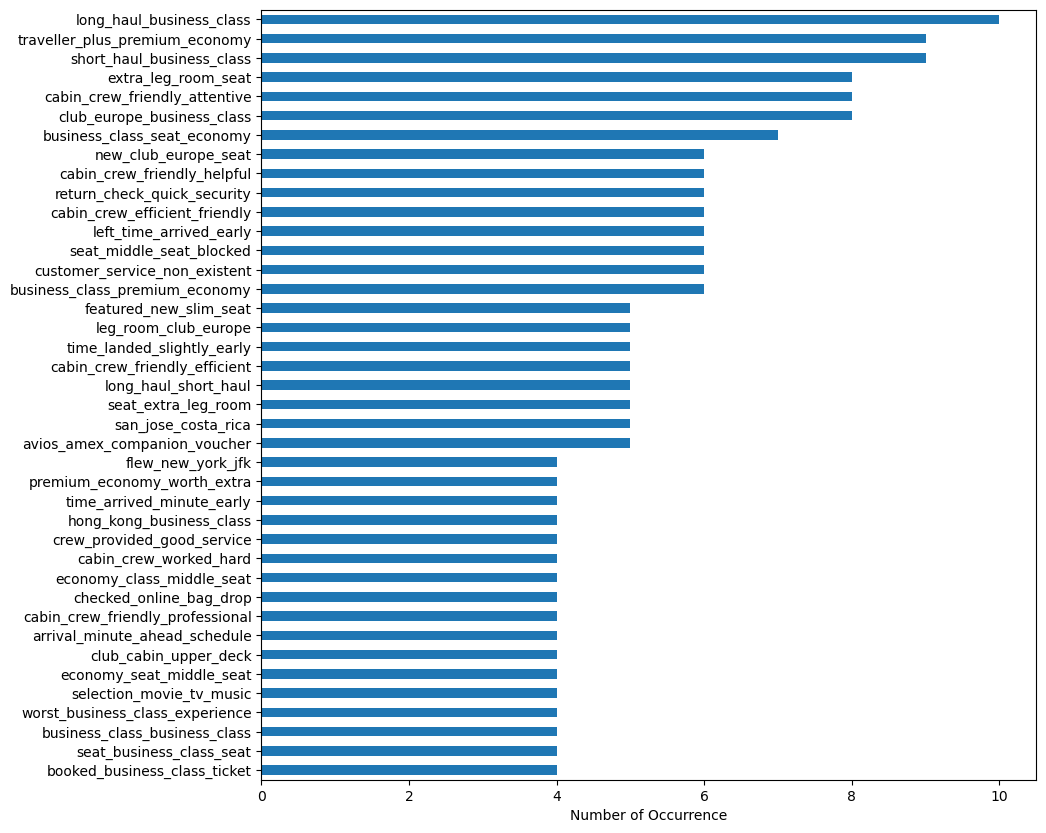

In [22]:
# Import necessary libraries
import nltk.collocations as collocations
from nltk import FreqDist, ngrams
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a 'Corpus' column containing text data

# Concatenate all reviews into one long text
reviews = " ".join(df.Corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Filter out stopwords
new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    # Generate n-grams (in this case, bigrams)
    ngrams_list = list(ngrams(new_words, number_of_ngrams))

    # Create FreqDist for n-grams and retrieve the most common 40
    ngram_fd = FreqDist(ngrams_list).most_common(40)

    # Sort the n-grams by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join the bigram tokens with '_' and maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to a Pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    ax.set_xlabel('Number of Occurrence')
    
    return ax

# Call the function to generate and plot n-grams
get_freq_dist(new_words, 4)

All customers expressed satisfaction with the cabin crew service and staff, as well as the general economy seats. A significant number of travelers opted for the Business class.

Areas of focus include improving the service and seats in the Economy class, enhancing the in-flight entertainment experience, and addressing delays. In the Business class, customers appear to be seeking better value for their money. Additionally, there is a need for improvement in handling customer service inquiries related to refunds and the refund process.